In [25]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import utils

In [26]:
# Load Dataset
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

/home/sibti/anaconda3/envs/ttf_gpu/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/sibti/anaconda3/envs/ttf_gpu/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [27]:
# the dataset has list of ints and pos/neg labels
word_indexes = keras.datasets.imdb.get_word_index()
reverse_index = dict([(value, key) for key, value in word_indexes.items()])

In [28]:
print('Review: ')
' '.join([reverse_index.get(i-3, '?') for i in train_data[9]])

Review: 


"? this movie has many problem associated with it that makes it come off like a low budget class project from someone in film school i have to give it credit on its ? though many times throughout the movie i found myself laughing hysterically it was so bad at times that it was comical which made it a fun watch br br if you're looking for a low grade slasher movie with a twist of psychological horror and a dash of campy ? then pop a bowl of popcorn invite some friends over and have some fun br br i agree with other comments that the sound is very bad dialog is next to impossible to follow much of the time and the soundtrack is kind of just there"

In [29]:
def vectorize_data(sequences, dimensions=10000):
    x_train = np.zeros((len(sequences), dimensions))
    for i, seq in enumerate(sequences):
        x_train[i, seq] = 1
    return x_train

In [30]:
x_train = vectorize_data(train_data)
x_test = vectorize_data(test_data)
y_train = np.asarray(train_labels).astype(np.float32)
y_test = np.asarray(test_labels).astype(np.float32)

In [31]:
# build Model
model = keras.Sequential([
    keras.layers.Dense(16, activation=keras.activations.relu),
    keras.layers.Dense(16, activation=keras.activations.relu),
    keras.layers.Dense(1, activation=keras.activations.sigmoid),
])

In [12]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.Accuracy(),]
)

In [32]:
x_val = x_train[:5000]
y_val = y_train[:5000]
xp_train = x_train[5000:]
yp_train = y_train[5000:]

In [14]:
hist = model.fit(
    xp_train,
    yp_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
40/40 [==============================] - 1s 16ms/step - loss: 0.4822 - accuracy: 0.0000e+00 - val_loss: 0.3468 - val_accuracy: 0.0000e+00
Epoch 2/20
40/40 [==============================] - 0s 10ms/step - loss: 0.2788 - accuracy: 0.0000e+00 - val_loss: 0.3051 - val_accuracy: 0.0000e+00

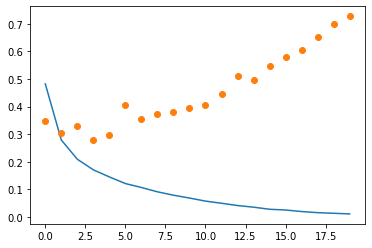

In [15]:
epochs = [i for i in range(20)]
plt.plot(epochs, hist.history['loss'],'-')
plt.plot(epochs, hist.history['val_loss'],'o')

In [16]:
new_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [17]:
new_model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

In [18]:
hist = new_model.fit(
    xp_train,
    yp_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/4
40/40 [==============================] - 0s 11ms/step - loss: 0.4764 - acc: 0.8148 - val_loss: 0.3694 - val_acc: 0.8560
Epoch 2/4
40/40 [==============================] - 0s 10ms/step - loss: 0.2707 - acc: 0.9087 - val_loss: 0.3490 - val_acc: 0.8540
Epoch 3/4
40/40 [==============================] - 0s 

In [19]:
model.evaluate(x_test, y_test)
# model.predict(x_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.8088 - accuracy: 0.0464

[0.8087735176086426, 0.04639999940991402]

In [20]:
# perform experiment
kE = utils.KerasExperiment()

Epoch 1/10
40/40 [==============================] - 0s 11ms/step - loss: 0.4589 - val_loss: 0.3241
Epoch 2/10
40/40 [==============================] - 0s 10ms/step - loss: 0.2573 - val_loss: 0.2775
Epoch 3/10
40/40 [==============================] - 0s 10ms/step - loss: 0.1950 - val_loss: 0.2817

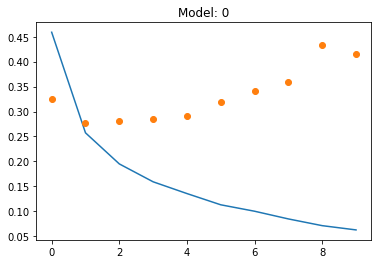

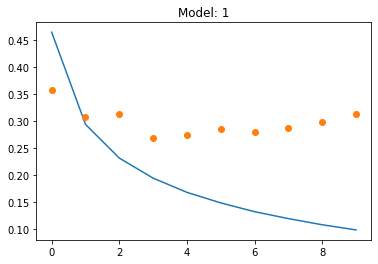

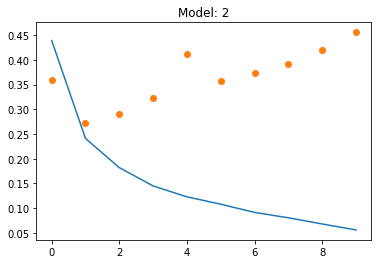

In [33]:
kE.build_dense_models(
        [
            [(16, 'relu'), (32, 'relu'), (1, 'sigmoid')],
            [(14, 'relu'), (1, 'sigmoid'), ],
            [(32, 'tanh'), (10, 'tanh'), (1, 'sigmoid')],
        ],
        [
            ['rmsprop', 'binary_crossentropy', None],
            ['rmsprop', 'binary_crossentropy', None],
            ['rmsprop', 'binary_crossentropy', None],
        ],
        [xp_train, yp_train],
        (x_val, y_val),
    )